# Analyzing CIA Factbook Data

In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

- `population` - The population as of 2015.
- `population_growth` - The annual population growth rate, as a percentage.
- `area` - The total land and water area.

You can download the SQLite database, `factbook.db`, [from this GitHub repo](https://github.com/factbook/factbook.sql/releases) if you want to work with it on your own computer. In this guided project, we'll explore the Python SQLite workflow to explore, analyze, and visualize data from this database. First things first, let's get familiar with the database.

In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('factbook.db')
cursor = conn.cursor()
query1 = 'SELECT * FROM sqlite_master'
cursor.execute(query1).fetchall()

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [3]:
pd.read_sql_query(query1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [4]:
query2 = 'SELECT * FROM facts LIMIT 5'
pd.read_sql_query(query2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## Summary Statistics

Let's start by calculating some summary statistics and look for any outlier countries.

In [5]:
query3 = '''
SELECT MIN(population) as min_pop, 
MAX(population) as max_pop,
MIN(population_growth) as min_growth,
MAX(population_growth) as max_growth
FROM facts
'''
pd.read_sql_query(query3, conn)

,min_pop,max_pop,min_growth,max_growth
0,0,7256490011,0.0,4.02


## Exploring Outliers

A few things stick out from the summary statistics in the last screen:

- there's a country with a population of `0`
- there's a country with a population of `7256490011` (or more than 7.2 billion people)

Let's zoom in on just these countries.

In [7]:
query4 = '''
SELECT * FROM facts
WHERE population == (SELECT MIN(population) FROM facts)
'''
pd.read_sql_query(query4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


In [8]:
query5 = '''
SELECT * FROM facts
WHERE population == (SELECT MAX(population) FROM facts)
'''
pd.read_sql_query(query5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


We can see that the country with the lowest population is Antartica, which will naturally have 0 population. The country that has the 7 billion people is not a country at all, but the total world population (at the time where the data was gathered).

## Histograms

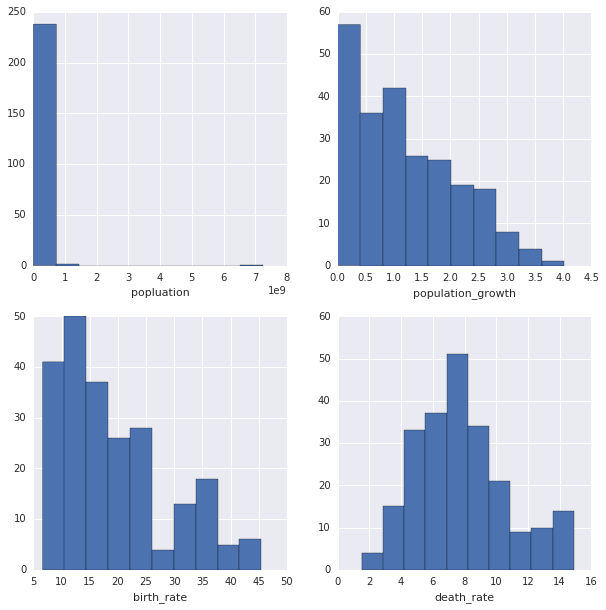

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

query6 = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population != (SELECT MIN(population) FROM facts)AND (SELECT MAX(population) FROM facts)
'''

data = pd.read_sql_query(query6, conn)

data['population'].hist(ax=ax1).set_xlabel('popluation')
data['population_growth'].hist(ax=ax2).set_xlabel('population_growth')
data['birth_rate'].hist(ax=ax3).set_xlabel('birth_rate')
data['death_rate'].hist(ax=ax4).set_xlabel('death_rate')

## Next Steps

That's it for the guided steps. Here are some next steps for you to explore:

- Which countries have the highest population density?
    - Population density is the ratio of population to land area. Compare your results with those from Wikipedia.
- Generate a histogram of population densities.
- Which countries have the highest ratios of water to land? Which countries have more water than land?